In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Importar las herramientas (esto va al inicio de tu notebook siempre)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes
import seaborn as sns

# Magia de Jupyter Notebook para ver los gráficos en línea
%matplotlib inline

# Cargar los datos
df = pd.read_csv('C:/Users/Rubén/Documents/DATA ANALIST/marketing_campaign.csv',sep = ';') # Asegúrate de tener el archivo en la misma ruta

# Primer vistazo: ¿Cómo es esto?
print("Dimensiones del DataFrame (filas, columnas):", df.shape)
print("\nPrimeras 5 filas:")
df.sample(5)

Dimensiones del DataFrame (filas, columnas): (2240, 29)

Primeras 5 filas:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
1724,1381,1982,PhD,Single,38513.0,1,0,2014-01-28,20,172,...,8,0,0,0,0,0,0,3,11,1
226,7375,1976,Graduation,Together,51369.0,0,1,2012-10-25,84,297,...,8,0,0,0,0,0,0,3,11,0
2054,6382,1953,Graduation,Together,48794.0,1,1,2014-06-26,97,25,...,4,0,0,0,0,0,0,3,11,0
1932,1458,1982,Master,Married,21059.0,1,0,2014-01-07,40,8,...,6,0,0,0,0,0,0,3,11,0


In [36]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [38]:
# ¿Dónde están los agujeros? (Valores nulos)
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [39]:
# Tratado de nulos
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [40]:
# Porcentaje de datos nulos en el DataFrame
total_celdas = np.product(df.shape)
total_nulos = df.isnull().sum().sum()
porcentaje_nulos = (total_nulos / total_celdas) * 100
print(f"Porcentaje de datos nulos en el DataFrame: {porcentaje_nulos:.2f}%")

Porcentaje de datos nulos en el DataFrame: 0.04%


In [41]:
# Valores no unicos en cada columna
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp2              2
Complain                  2
AcceptedCmp1              2
AcceptedCmp5              2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
ID                     2240
dtype: int64

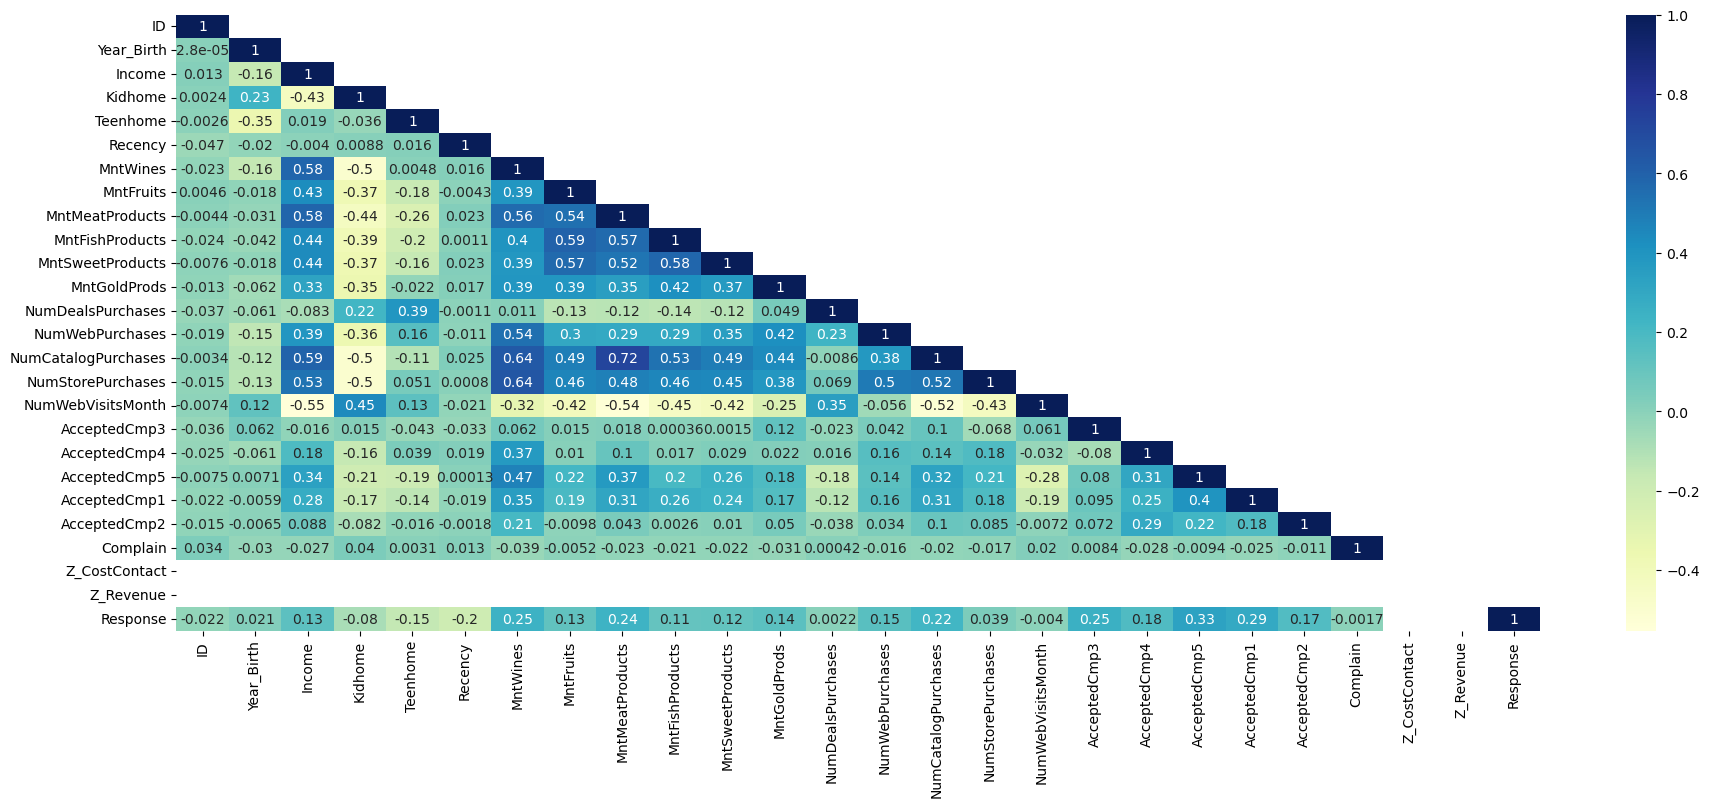

In [42]:
# Gráfica de correlación
plt.figure(figsize=(22, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_df = numeric_df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='YlGnBu', annot=True)
plt.show()

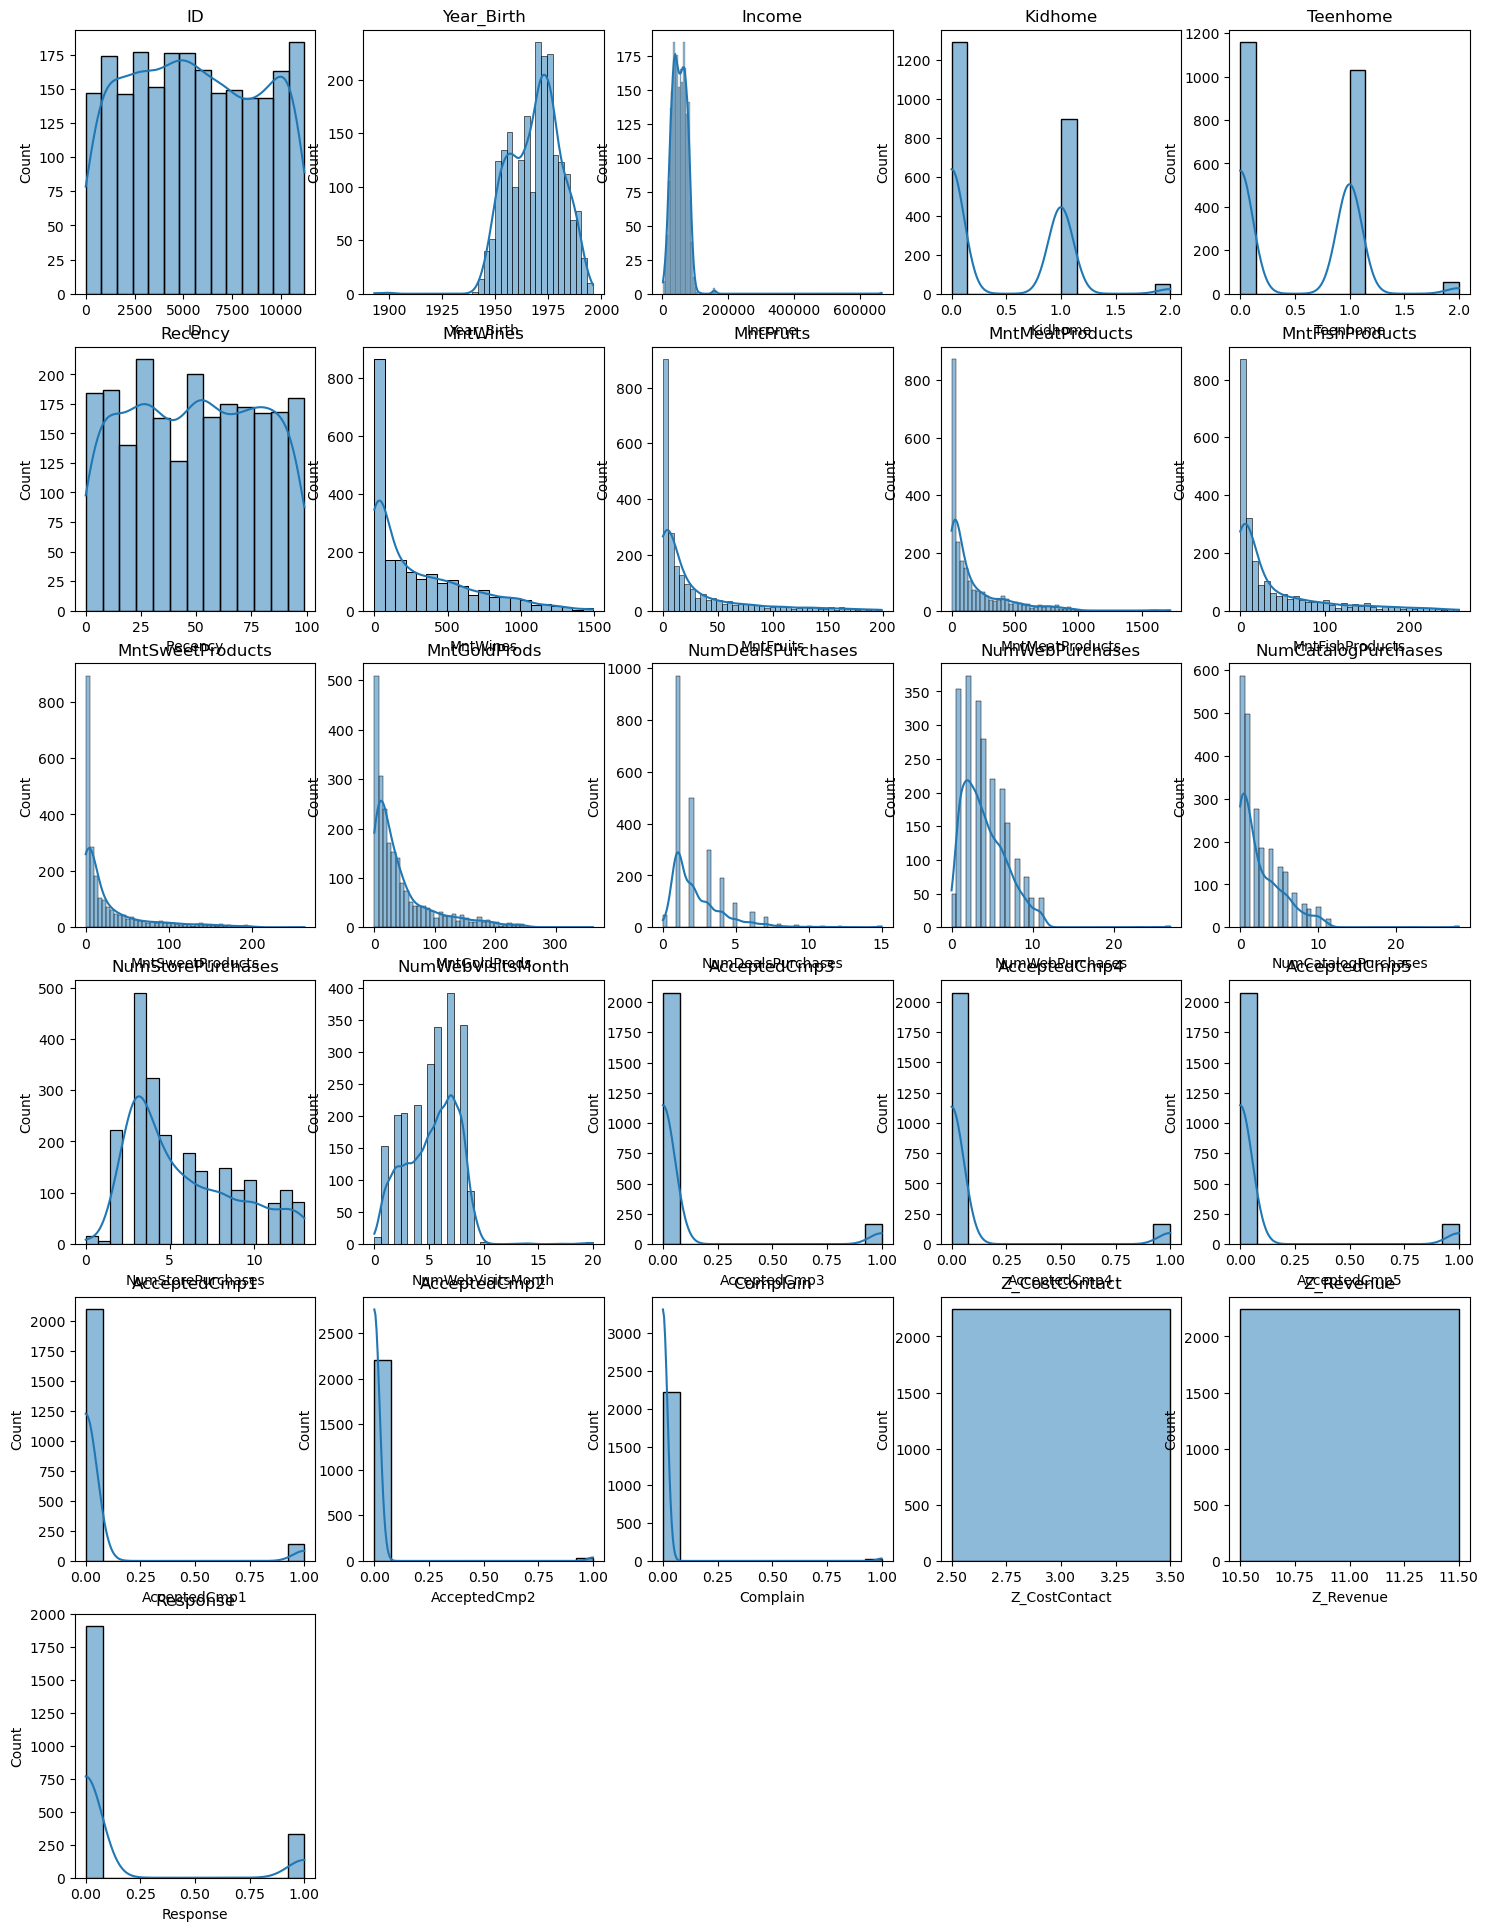

In [43]:
# Grafica exploratoria de todas las columnas numéricas (ajustado para cualquier cantidad de columnas)
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 5 # Número de columnas por fila en la gráfica
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Aplanar para fácil indexado

for i, column in enumerate(numeric_cols):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Si hay más subplots que columnas, ocultar los ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

In [44]:
# Limpieza de datos en un df nuevo
df2 = df.copy()
df2.drop('ID', axis=1, inplace=True) # La columna ID no aporta nada
df2.drop('Dt_Customer', axis=1, inplace=True) # La columna Dt_Customer no aporta nada

In [45]:
# generar variables transfdormadas logarítmicamente
# Para variables que tienen sesgo alto

for col in ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
    df2[f'{col}_log'] = np.log1p(df2[col]+1)

In [46]:
df2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,NumDealsPurchases_log,NumWebPurchases_log,NumCatalogPurchases_log,NumStorePurchases_log,NumWebVisitsMonth_log
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4.499810,6.306275,5.159055,4.499810,4.499810,1.609438,2.302585,2.484907,1.791759,2.197225
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1.098612,2.079442,1.386294,1.098612,2.079442,1.386294,1.098612,1.098612,1.386294,1.945910
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,3.931826,4.859812,4.727388,3.135494,3.784190,1.098612,2.302585,1.386294,2.484907,1.791759
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,1.791759,3.091042,2.484907,1.609438,1.945910,1.386294,1.386294,0.693147,1.791759,2.079442
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3.806662,4.787492,3.871201,3.367296,2.833213,1.945910,1.945910,1.609438,2.079442,1.945910


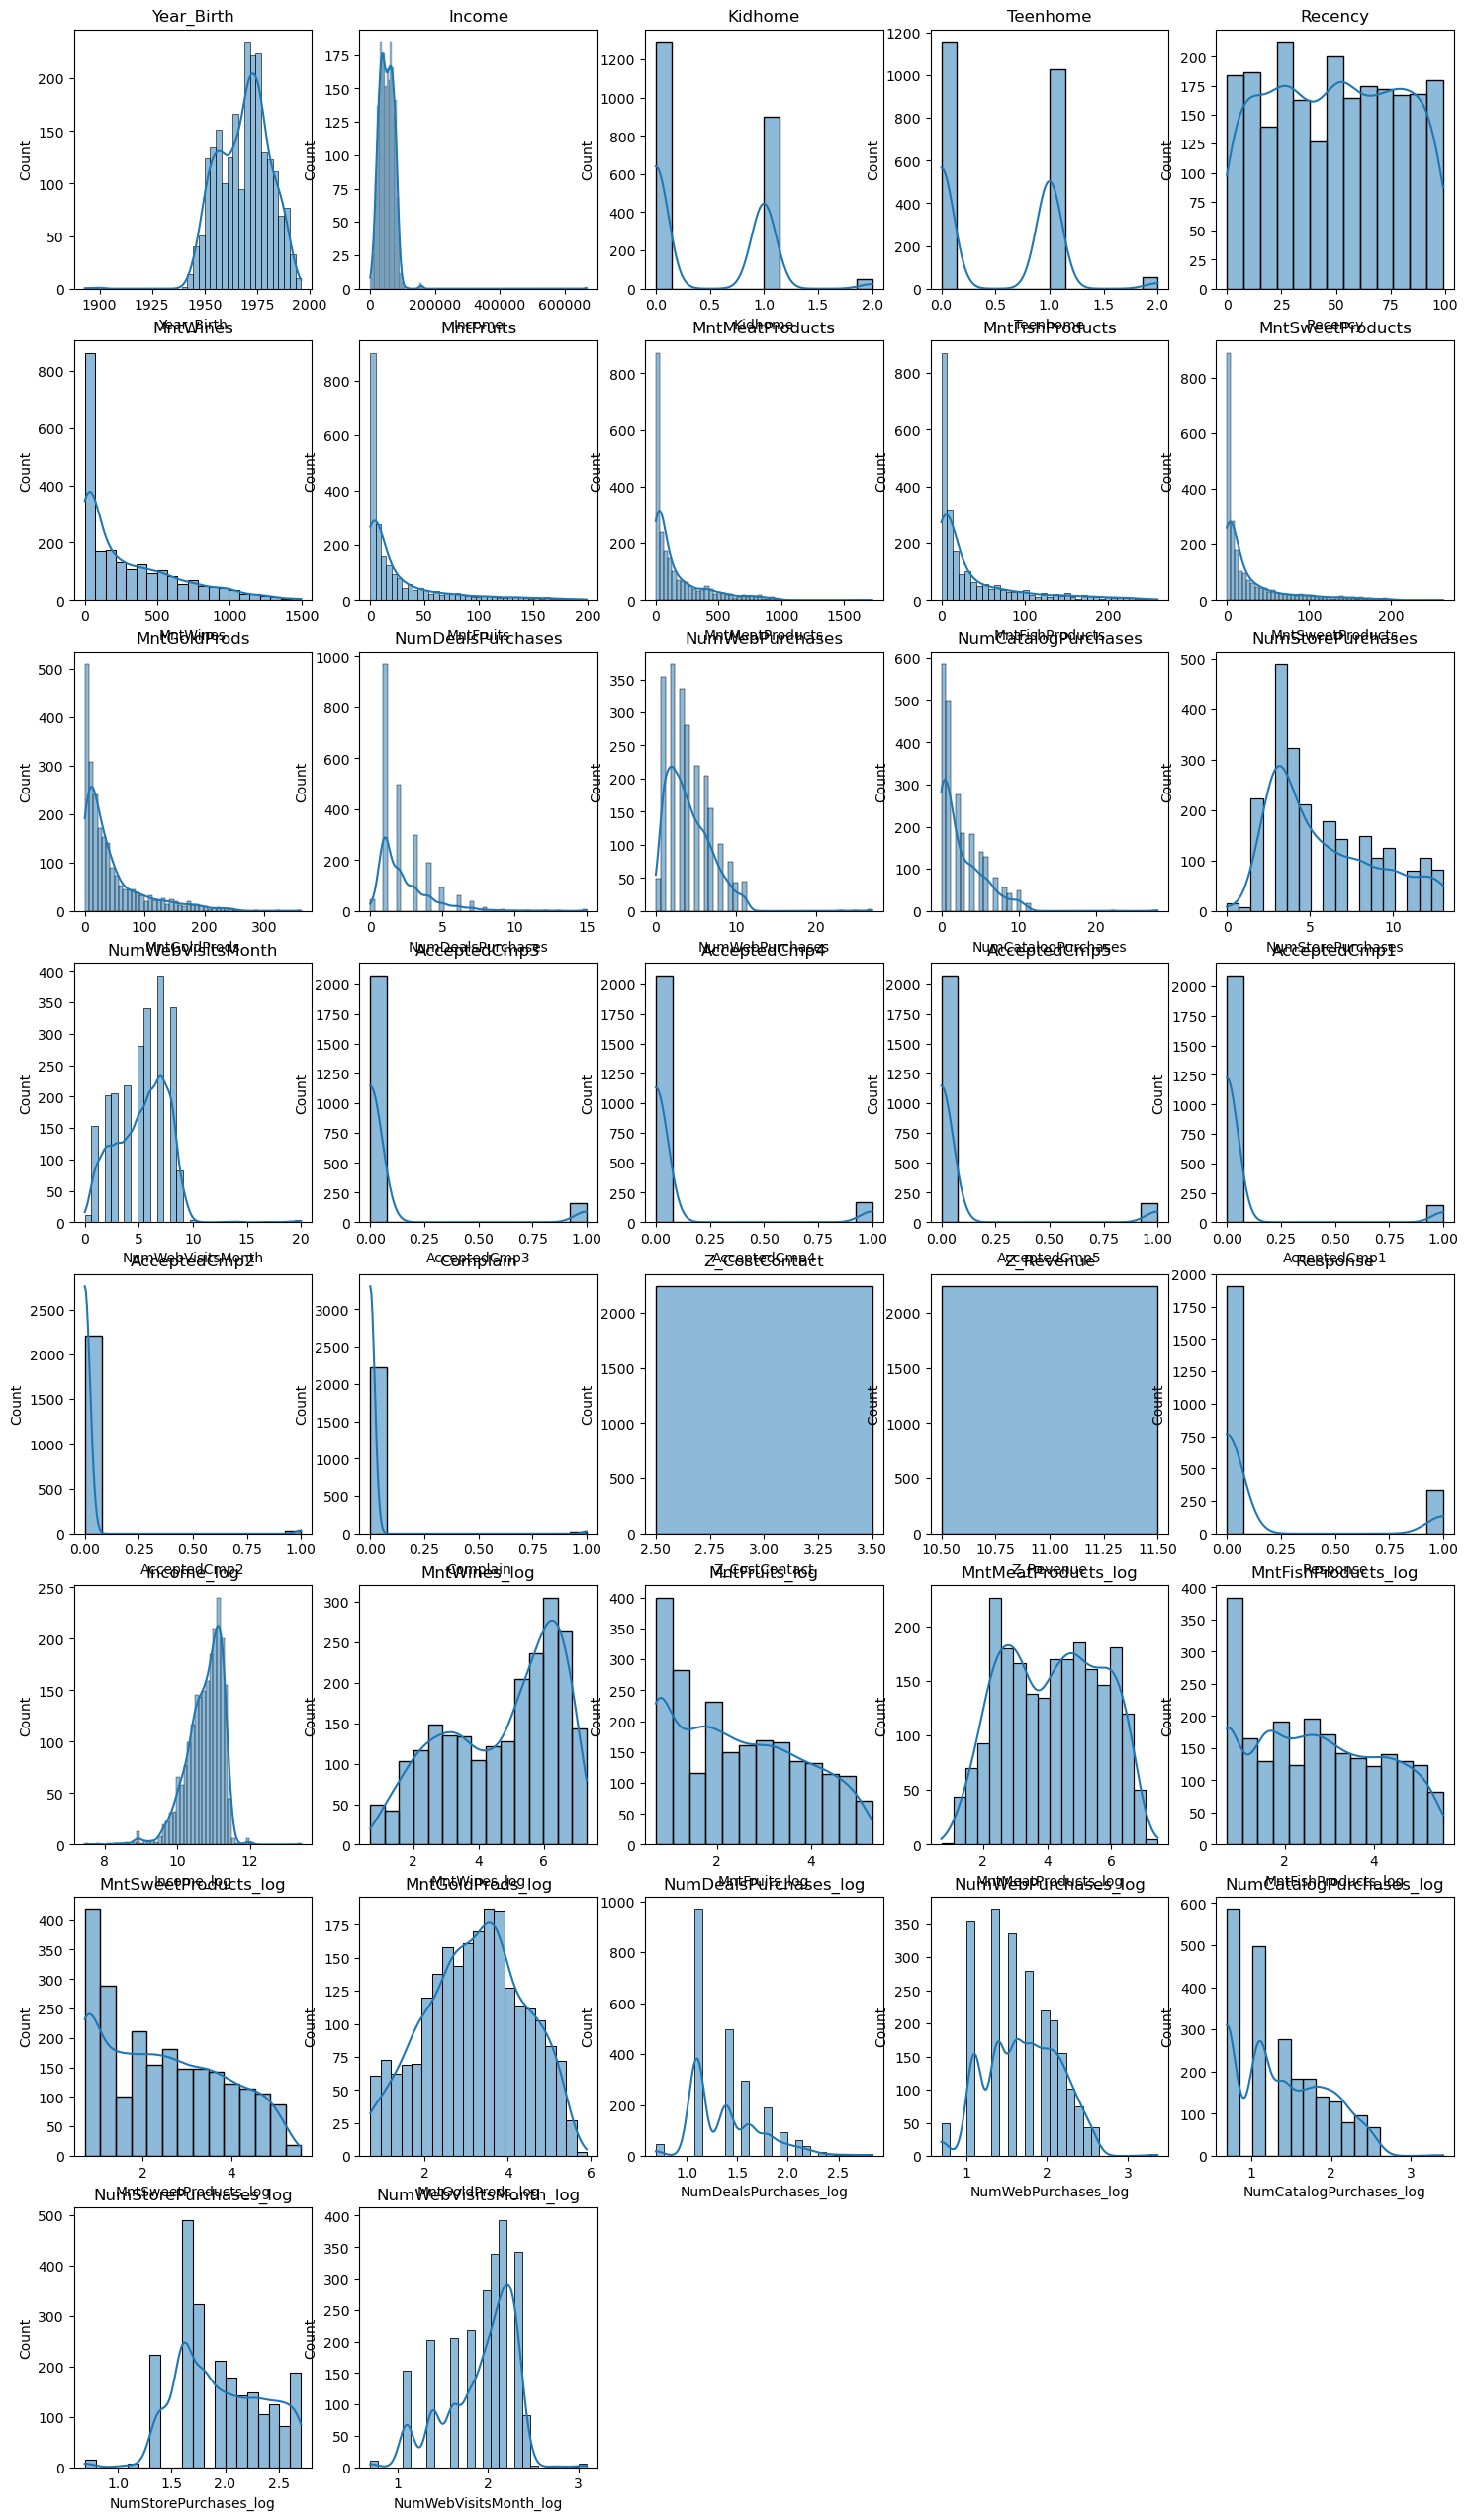

In [47]:
# Grafica exploratoria de todas las columnas numéricas (ajustado para cualquier cantidad de columnas)
numeric_cols = df2.select_dtypes(include=[np.number]).columns
n_cols = 5 # Número de columnas por fila en la gráfica
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Aplanar para fácil indexado

for i, column in enumerate(numeric_cols):
    sns.histplot(df2[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Si hay más subplots que columnas, ocultar los ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

### Data Split

In [48]:
# Libreria de split
from sklearn.model_selection import train_test_split

X = df2.drop('Response', axis=1)  # Características
y = df2['Response']  # Variable objetivo

# Convertir categoricas a dummies
# X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [49]:
y.sample(5)

1032    0
1595    1
1556    1
2202    1
1670    1
Name: Response, dtype: int64

In [50]:
print("{0:2f}% data is in training set".format((len(X_train)/len(df2.index))*100))
print("{0:2f}% data is in test set".format((len(X_test)/len(df2.index))*100))

70.000000% data is in training set
30.000000% data is in test set


In [51]:
# Validación de la estructura de los datasets

print("Original Personal Loan True Values: {0} ({1:.2f}%)".format(len(df2.loc[df2["Response"] == 1]), (len(df2.loc[df2["Response"] == 1])/len(df2.index)) * 100))
print("Original Personal Loan False Values: {0} ({1:.2f}%)".format(len(df2.loc[df2["Response"] == 0]), (len(df2.loc[df2["Response"] == 0])/len(df2.index)) * 100))

print("Training Personal Loan True Values: {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values: {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

print("Test Personal Loan True Values: {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values: {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original Personal Loan True Values: 334 (14.91%)
Original Personal Loan False Values: 1906 (85.09%)
Training Personal Loan True Values: 226 (14.41%)
Training Personal Loan False Values: 1342 (85.59%)
Test Personal Loan True Values: 108 (16.07%)
Test Personal Loan False Values: 564 (83.93%)


In [53]:
# Simple modelo de regresión logística utilizando df2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))



ValueError: could not convert string to float: 'Master'